
# **Teste Z e T**
1. **Opte pelo teste t** se a **variância** da população for **desconhecida** ou se o **tamanho** da amostra for **pequeno (n < 30)**. Este teste é particularmente **vantajoso** em cenários com **limitações de dados** e **incerteza** quanto à variância populacional, devido à sua distribuição t de Student.

2. **Prefira o teste z** quando a **variância** da população for **conhecida** e o **tamanho** da amostra for **considerável (n > 30)**. Este teste se baseia na distribuição normal padrão, **adequada** para contextos em que as **informações** sobre a variância são **claras e o volume de dados é substancial**.




## Teste Z
Máquina fabrica perfumes com média μ = 150 ml e desvio padrão 𝜎 = 2 ml. Uma amostra aleatória de 100 frascos de perfume é colhida e observa-se uma média de 150,2 ml. A máquina está operando corretamente (confiança = 95%)?

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats

Vamos agora plotar a distribuição desses dados usando displot.

In [6]:
df  = pd.read_csv('Machine1.csv')
df

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58
...,...
95,150.03
96,146.79
97,150.02
98,146.42


In [7]:
df.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


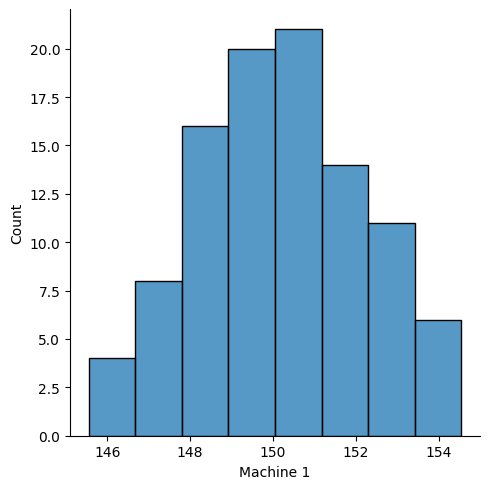

In [8]:
sns.displot(data=df, x='Machine 1')

Vamos plotar um boxplot dos nossos dados.

<Axes: >

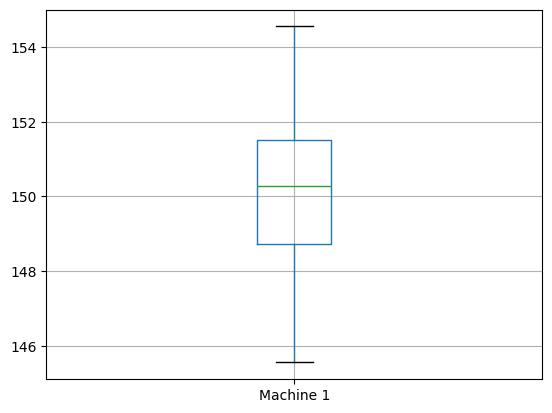

In [9]:
df.boxplot(column=['Machine 1'])

Para realizar nosso teste de hipótese (Teste Z) vamos usar weightstats.

hipotese Nula\
H0: μ = 150 ml \
hipotese  Alternativa\
HA: μ <> 150 ml

In [10]:
weightstats.ztest(x1=df['Machine 1'], value=150, alternative='two-sided')

(1.0060370247722599, 0.3143977600779597)

Tendo em vista que P Value é 0,31 (portanto, maior que 0,05), falhamos em rejeitar a hipótese nula. Assim, a máquina está operando corretamente.

## Teste t
Máquina fabrica perfumes com média μ = 150 ml. Uma amostra aleatória de 4 frascos de perfume é colhida e observa-se uma média de 151 ml e um desvio padrão amostral s = 2 ml. A máquina está operando corretamente (confiança = 95%)?

hipotese nula\
H0: μ = 150 ml \
hipotese alternativa\
HA: μ <> 150 ml

Vamos começar gerando as 4 amostras.

In [12]:
volume = pd.Series([148.5, 153.4, 150.9, 151.2])
volume

0    148.5
1    153.4
2    150.9
3    151.2
dtype: float64

In [14]:
volume.describe()

count      4.000000
mean     151.000000
std        2.004994
min      148.500000
25%      150.300000
50%      151.050000
75%      151.750000
max      153.400000
dtype: float64

Vamos agora realizar o Teste t.

In [15]:
stats.ttest_1samp(volume, 150)

TtestResult(statistic=0.997509336107632, pvalue=0.3920333832606524, df=3)

Tendo em vista que P Value = 0,39 - maior que 0,05 - falhamos em rejeitar a hipótese nula. Assim, a máquina está operando corretamente.

Exercício 1 \
Suponha que uma máquina envase garrafas de vinho com média 750 ml e desvio padrão desconhecido. A vinícola decidiu realizar um teste de hipótese com erro alfa = 0,05 e duas caudas. Para tanto, escolheu 4 amostras do arquivo Machine2.csv. Realize o teste t e informe se a máquina está operando corretamente (hipótese nula).

H0: μ = 750 ml
Ha: μ ≠ 750 ml

In [32]:

df_vinho = pd.read_csv('Machine2.csv')


In [30]:
stats.ttest_1samp(df_vinho.head(4), 750)

TtestResult(statistic=array([1.03425574]), pvalue=array([0.37707878]), df=array([3]))

Tendo em vista que P Value = 0,37 (maior que 0,05), falhamos em rejeitar a hipótese nula. Portanto, a máquina está envasando corretamente.

Exercício 2 \
Suponha que o desvio padrão da máquina seja conhecido (15 ml). Realize um teste Z com as 50 amostras disponíveis no arquivo 'machine2.csv'.

In [31]:
weightstats.ztest(x1=df_vinho['Machine 2'].head(50), value=750, alternative='two-sided')

(0.9804661150943946, 0.32685608794791343)

Tendo em vista que P Value = 0,32 (maior que 0,05), falhamos em rejeitar a hipótese nula. Portanto, a máquina está envasando corretamente.